<div style="width: 38.5%;">
    <p><strong>City College of San Francisco</strong><p>
    <hr>
    <p>MATH 108 - Foundations of Data Science</p>
</div>

# Lecture 25: Center and Spread

Associated Textbook Sections: [14.0, 14.1, 14.2](https://inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html)

<h2>Set Up the Notebook<h2>

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-25:-Center-and-Spread" data-toc-modified-id="Lecture-25:-Center-and-Spread-1">Lecture 25: Center and Spread</a></span><ul class="toc-item"><li><span><a href="#Set-Up-the-Notebook" data-toc-modified-id="Set-Up-the-Notebook-1.1">Set Up the Notebook</a></span></li><li><span><a href="#" data-toc-modified-id="-1.2"></a></span></li><li><span><a href="#Center-and-Spread" data-toc-modified-id="Center-and-Spread-1.3">Center and Spread</a></span><ul class="toc-item"><li><span><a href="#Topic-Motivation" data-toc-modified-id="Topic-Motivation-1.3.1">Topic Motivation</a></span></li></ul></li><li><span><a href="#Average" data-toc-modified-id="Average-1.4">Average</a></span><ul class="toc-item"><li><span><a href="#The-Average-(or-Mean)" data-toc-modified-id="The-Average-(or-Mean)-1.4.1">The Average (or Mean)</a></span></li><li><span><a href="#Demo:-Average-(Mean)" data-toc-modified-id="Demo:-Average-(Mean)-1.4.2">Demo: Average (Mean)</a></span></li><li><span><a href="#Reflection" data-toc-modified-id="Reflection-1.4.3">Reflection</a></span></li><li><span><a href="#Comparing-Mean-and-Median" data-toc-modified-id="Comparing-Mean-and-Median-1.4.4">Comparing Mean and Median</a></span></li><li><span><a href="#Reflection" data-toc-modified-id="Reflection-1.4.5">Reflection</a></span></li></ul></li><li><span><a href="#Standard-Deviation" data-toc-modified-id="Standard-Deviation-1.5">Standard Deviation</a></span><ul class="toc-item"><li><span><a href="#Defining-Variability" data-toc-modified-id="Defining-Variability-1.5.1">Defining Variability</a></span></li><li><span><a href="#Demo:-Standard-Deviation" data-toc-modified-id="Demo:-Standard-Deviation-1.5.2">Demo: Standard Deviation</a></span></li><li><span><a href="#How-Far-from-the-Average?" data-toc-modified-id="How-Far-from-the-Average?-1.5.3">How Far from the Average?</a></span></li><li><span><a href="#Why-Use-the-SD?" data-toc-modified-id="Why-Use-the-SD?-1.5.4">Why Use the SD?</a></span></li></ul></li></ul></li></ul></div>

## Center and Spread

### Topic Motivation

* How can we quantify natural concepts like "center" and "variability"?
* Why do many of the empirical distributions that we generate come out bell shaped?
* How is sample size related to the accuracy of an estimate?

## Average

### The Average (or Mean)

* Example
    * Data: 2, 3, 3, 9    
    * Average = (2+3+3+9)/4 = 4.25
* Need not be a value in the collection
* Need not be an integer even if the data are integers
* Somewhere between min and max, but not necessarily halfway in between
* Same units as the data
* Smoothing operator: collect all the contributions in one big pot, then split evenly

### Demo: Average (Mean)

Explore various ways to calculate and interpret the average.

In [2]:
values = make_array(2, 3, 3, 9)

In [3]:
sum(values)/len(values)

4.25

In [4]:
np.average(values)

4.25

In [5]:
np.mean(values)

4.25

In [6]:
(2 + 3 + 3 + 9)/4

4.25

In [7]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

In [8]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


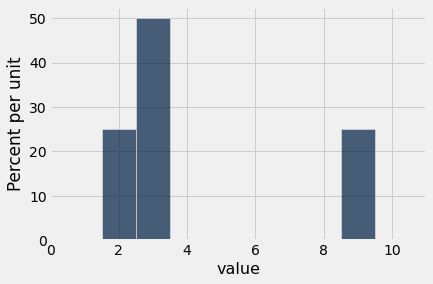

In [9]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(0, bins = bins_for_display)

Let's see what happens when we increase the number of values {2, 3, 9} in the table and preserve the proportions.

In [10]:
new_vals = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)

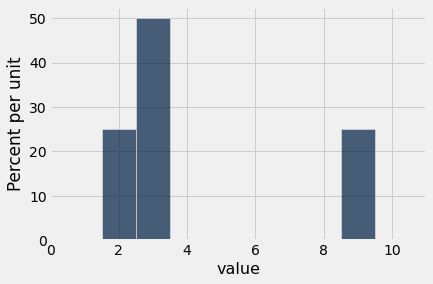

In [11]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)

In [12]:
np.average(values)

4.25

In [13]:
np.average(new_vals)

4.25

### Reflection

<img src="img/lec25_histograms.png" width = 80%>

* Are the medians of these two distributions the same or different? 
* Are the means the same or different? 
* If you say "different," then say which one is bigger.

### Comparing Mean and Median 

* Mean: Balance point of the histogram
* Median: Half-way point of data; half the area of histogram is on either side of median
* If the distribution is symmetric about a value, then that value is both the average and the median.
* If the histogram is skewed, then the mean is pulled away from the median in the direction of the tail.

### Reflection

<img src="img/lec25_nba.png" width = 50%>

Is the mean or median larger for the distribution of NBA player heights?

## Standard Deviation

### Defining Variability

* Plan A: “biggest value - smallest value”
    * Doesn’t tell us much about the shape of the distribution
* Plan B:
    * Measure variability around the mean
    * Need to figure out a way to quantify this


### Demo: Standard Deviation

Explore the standard deviation.

In [14]:
values = make_array(2, 3, 3, 9)

In [15]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [16]:
average_value = np.average(sd_table.column(0))
average_value

4.25

In [17]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [18]:
sum(deviations)

0.0

In [19]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


Explore the variance of the data and see it's relationship with the standard deviation.

In [20]:
variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

Standard Deviation (SD) is the square root of the variance

In [21]:
sd = variance ** 0.5
sd

2.7726341266023544

In [22]:
np.std(values)

2.7726341266023544

### How Far from the Average?

* Standard deviation (SD) measures roughly how far the data are from their average
* SD = root mean square of deviations from average
* SD has the same units as the data

### Why Use the SD?

There are two main reasons.

* No matter what the shape of the distribution, the bulk of the data are in the range "average ± a few SDs" (Chebyshev's Inequality)
* Coming up in a future lecture.

<footer>
    <hr>
    <p>Adopted from UC Berkeley DATA 8 course materials.</p>
    <p>This content is offered under a <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC Attribution Non-Commercial Share Alike</a> license.</p>
</footer>